In [23]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from dataloader.py, import the dataset df
from dataloader import df

In [24]:
df.head()

Gender   Age  Height  Weight  ...  TUE  CALC  MTRANS  NObeyesdad
0       0  21.0    1.62    64.0  ...  1.0     3       3           1
1       0  21.0    1.52    56.0  ...  0.0     2       3           1
2       1  23.0    1.80    77.0  ...  1.0     1       3           1
3       1  27.0    1.80    87.0  ...  0.0     1       4           5
4       1  22.0    1.78    89.8  ...  0.0     2       3           6

[5 rows x 17 columns]

In [25]:
df.tail()

Gender        Age    Height  ...  CALC  MTRANS  NObeyesdad
2106       0  20.976842  1.710730  ...     2       3           4
2107       0  21.982942  1.748584  ...     2       3           4
2108       0  22.524036  1.752206  ...     2       3           4
2109       0  24.361936  1.739450  ...     2       3           4
2110       0  23.664709  1.738836  ...     2       3           4

[5 rows x 17 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [27]:
df.describe()

Gender          Age  ...       MTRANS   NObeyesdad
count  2111.000000  2111.000000  ...  2111.000000  2111.000000
mean      0.505921    24.312600  ...     2.365230     3.015632
std       0.500083     6.345968  ...     1.261423     1.952090
min       0.000000    14.000000  ...     0.000000     0.000000
25%       0.000000    19.947192  ...     3.000000     1.000000
50%       1.000000    22.777890  ...     3.000000     3.000000
75%       1.000000    26.000000  ...     3.000000     5.000000
max       1.000000    61.000000  ...     4.000000     6.000000

[8 rows x 17 columns]

In [28]:
df.shape

(2111, 17)

In [29]:
# Check for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

We can infer that there are no missing/NaN values in the dataset

In [30]:
df

Gender        Age    Height  ...  CALC  MTRANS  NObeyesdad
0          0  21.000000  1.620000  ...     3       3           1
1          0  21.000000  1.520000  ...     2       3           1
2          1  23.000000  1.800000  ...     1       3           1
3          1  27.000000  1.800000  ...     1       4           5
4          1  22.000000  1.780000  ...     2       3           6
...      ...        ...       ...  ...   ...     ...         ...
2106       0  20.976842  1.710730  ...     2       3           4
2107       0  21.982942  1.748584  ...     2       3           4
2108       0  22.524036  1.752206  ...     2       3           4
2109       0  24.361936  1.739450  ...     2       3           4
2110       0  23.664709  1.738836  ...     2       3           4

[2111 rows x 17 columns]

In [31]:
# Looking at the dataset, we see the categorical features and the continuous features. 
categorical_features = ["Gender", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
continuous_features = ["Age", "Height", "Weight", "CH2O","FAF", "TUE"]
target_variable = ['NObeyesdad']

# Data Preprocessing and Analysis Workflow
In this workflow, we will fllow a systematic approach to understand and prepare our dataset for modelling. The key steps involved are as follows : 

1. **Encoding the categorical features** : 
- Encoding the categorical features with string values before splitting ensures consistency in the feature space across training and test datasets.
2. **Exploratory Data Analysis (EDA)** : 
- Conduct comprehensive EDA to uncover insigihts about the data
- Generate various visualizations to get a better understanding of feature distributions, relationships and potential outliers
3. **Cleaning the data** : 
- Removing the outliers in continuous features 
4. **Train-Test Split** : 
- Split the dataset into training and testing sets to evaluate model performance
- This ensures that the model is trained on one portion of the data and validated on an unseen portion. 
5. **Scaling the continuous features** : 
- Apply `StandardScaler` to the continuous features to standardize their values.
- This transformation will center the data around a mean of `0` and scale it to have a standard deviation of `1`

## Encoding

In [32]:
# LabelEncode the Categorical Features with dtype = "Object"

from sklearn.preprocessing import LabelEncoder

features_dtype_object = df.select_dtypes(include=[object]).columns
label_encoder = LabelEncoder()
for col in features_dtype_object:
    df[col] = label_encoder.fit_transform(df[col])

## Exploratory Data Analysis

### Correlation Matrix

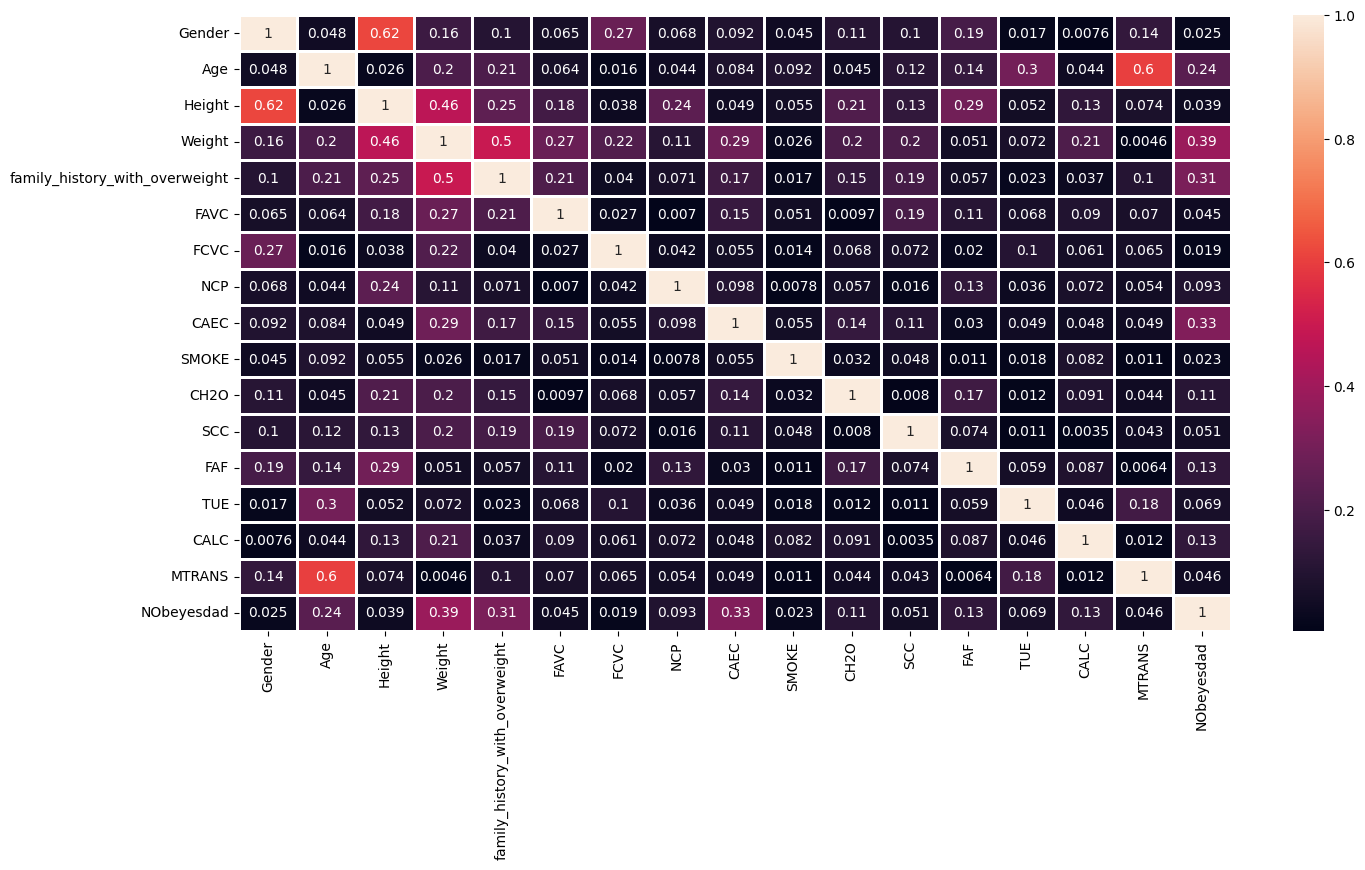

In [33]:
plt.figure(figsize=(16,8))
correlation = df.corr()
sns.heatmap(abs(correlation), linewidths=1, annot=True)
plt.show()

### Pair Plots

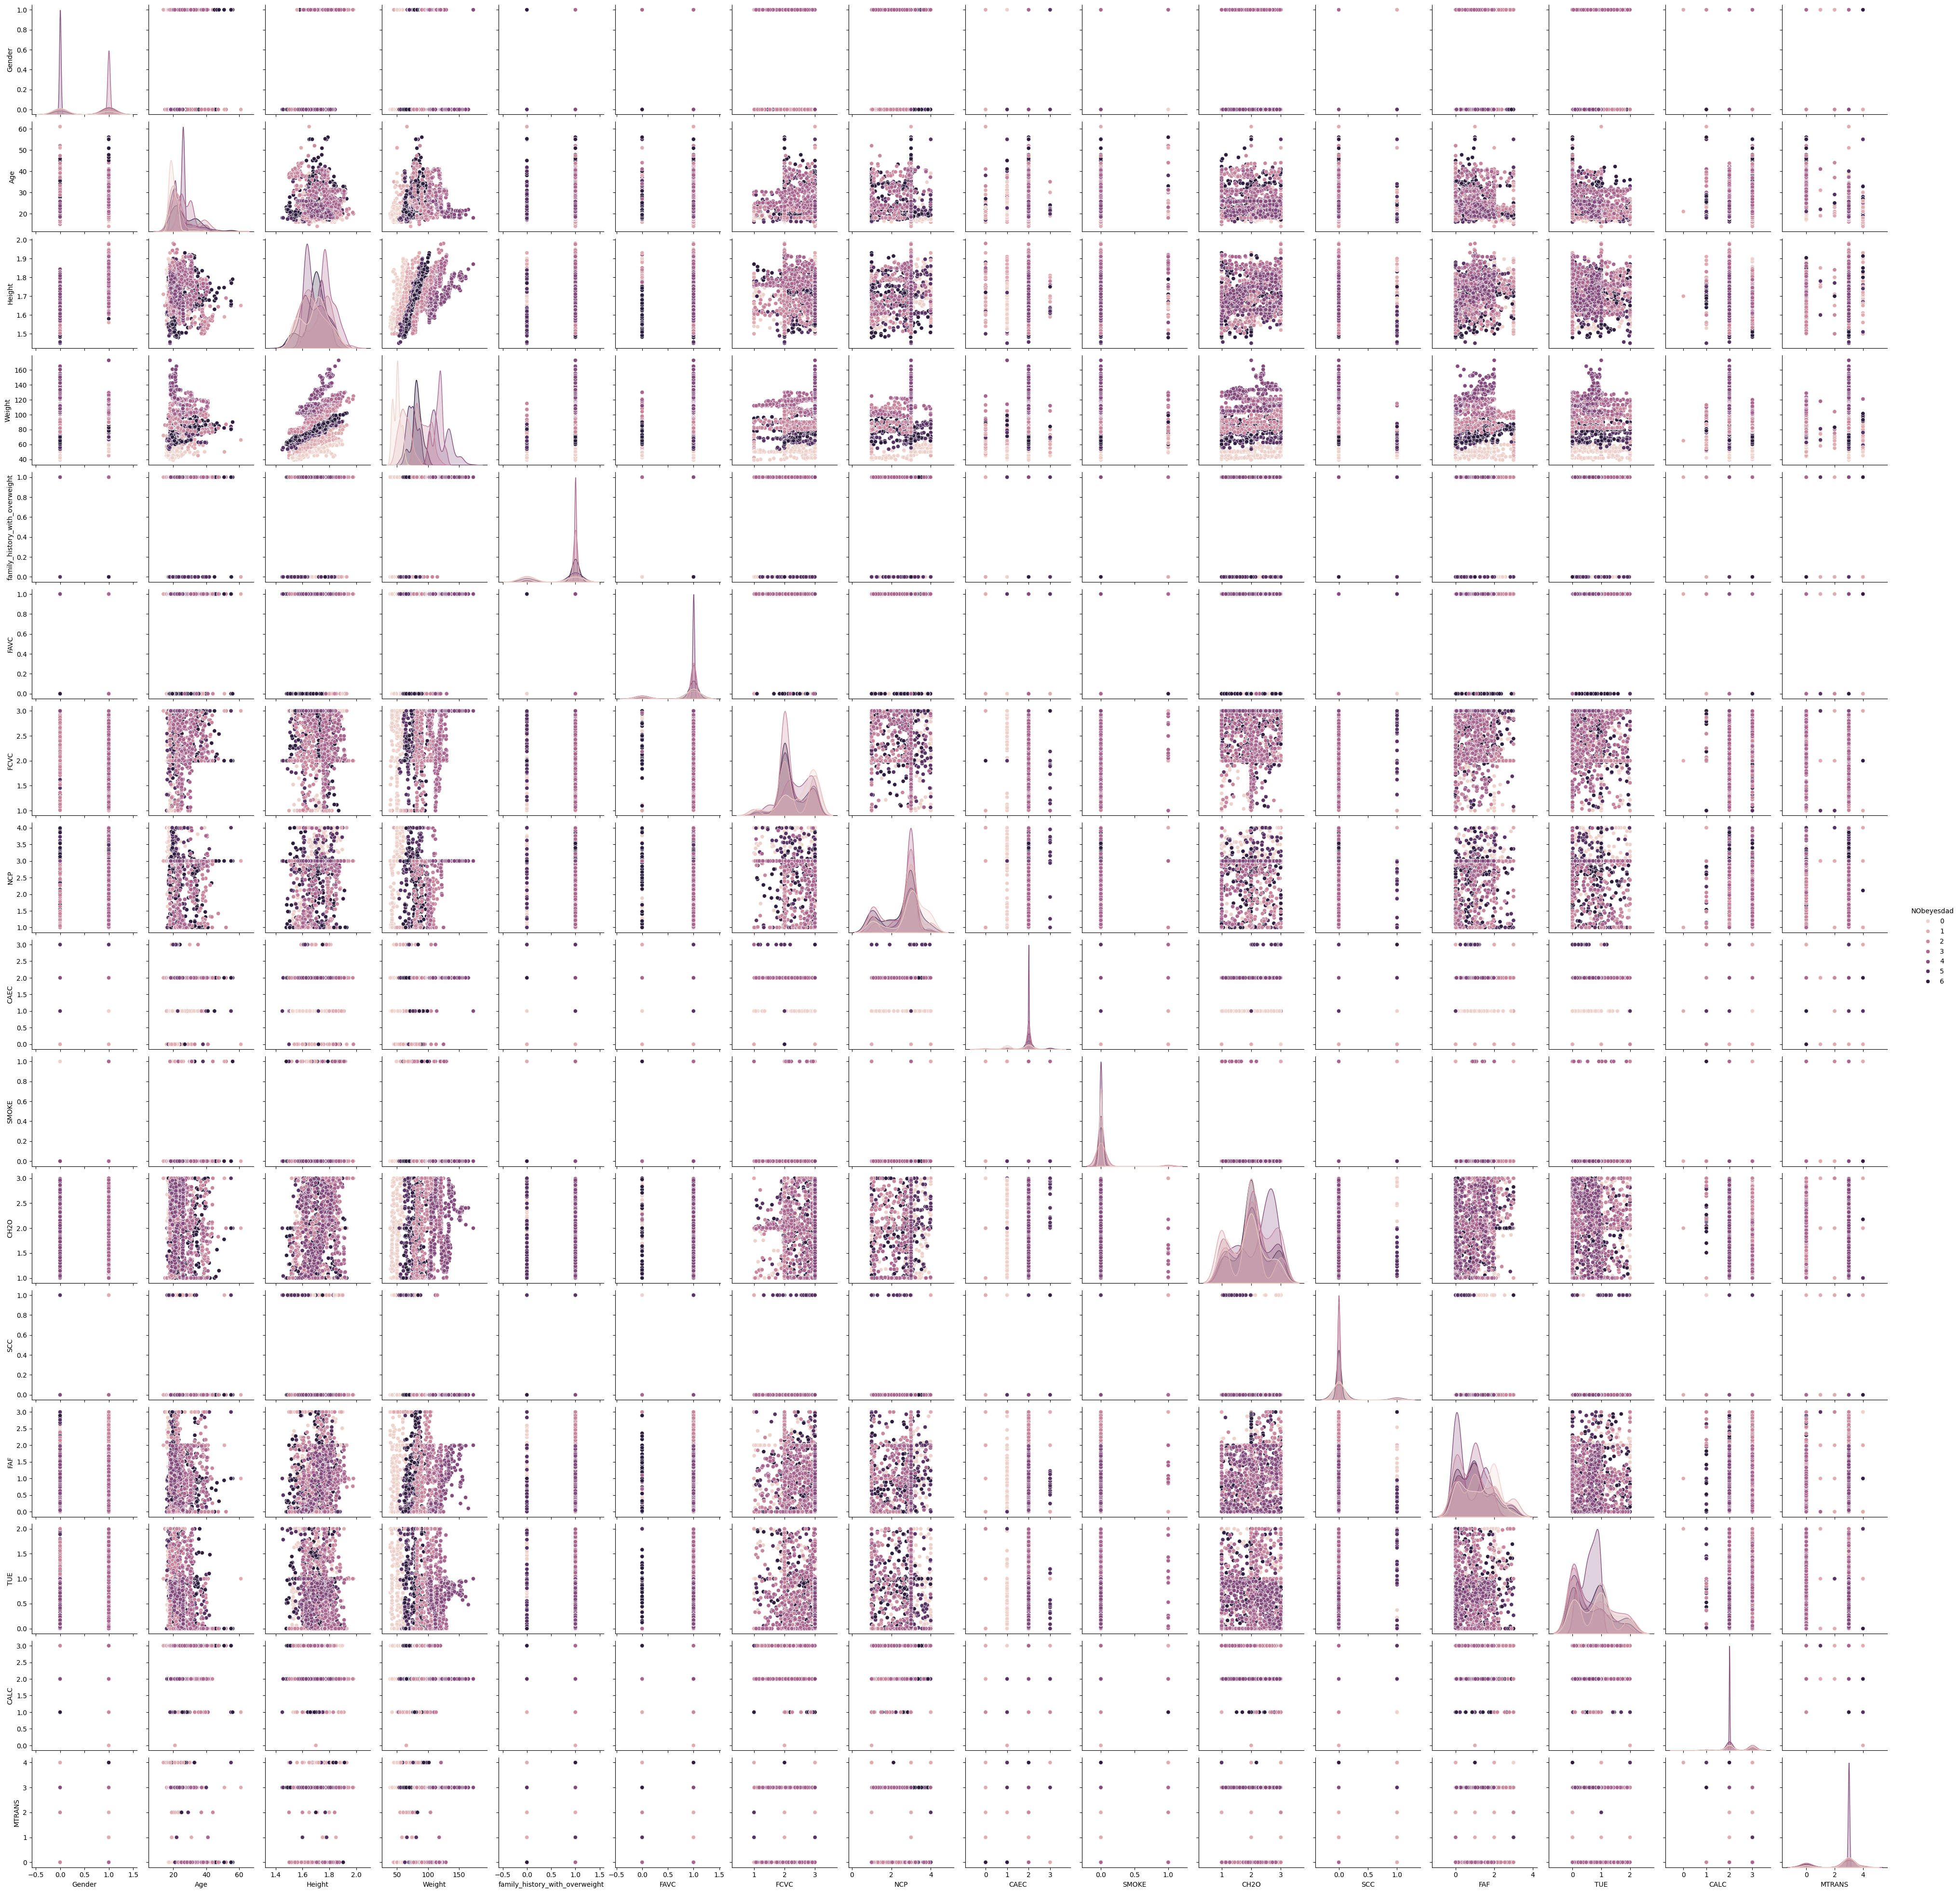

In [34]:
sns.pairplot(df, hue='NObeyesdad')
plt.show()

### Histplots for the Continuous Features


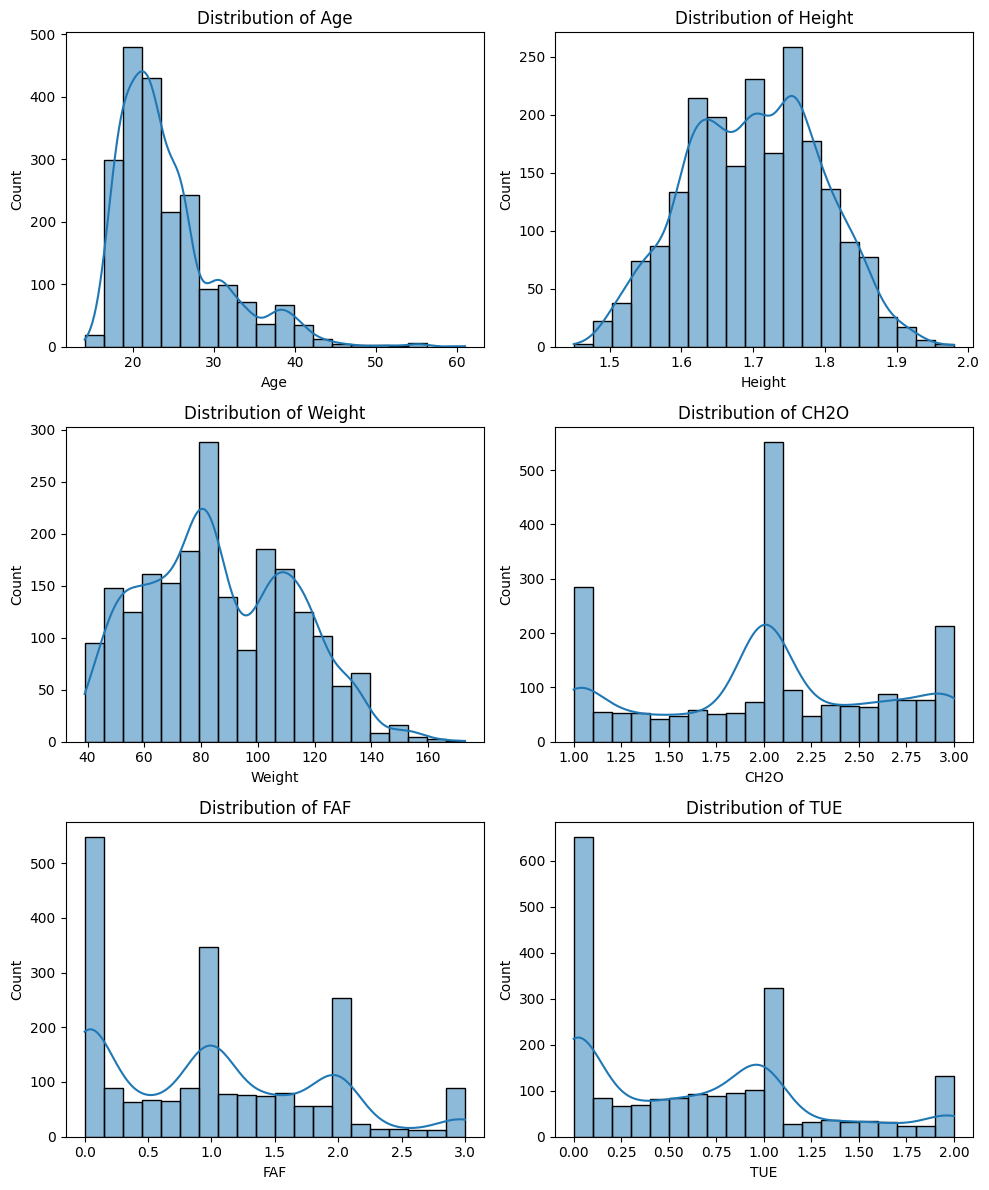

In [35]:
# continuous_features = ["Age", "Height", "Weight", "CH2O","FAF", "TUE"]
fig, ax = plt.subplots(3, 2, figsize = (10,12))

sns.histplot(df['Age'], bins=20, ax=ax[0,0], kde=True)
ax[0,0].set_title('Distribution of Age')

sns.histplot(df['Height'], bins=20, ax=ax[0,1], kde=True)
ax[0,1].set_title('Distribution of Height')

sns.histplot(df['Weight'], bins=20, ax=ax[1,0], kde=True)
ax[1,0].set_title('Distribution of Weight')

sns.histplot(df['CH2O'], bins=20, ax=ax[1,1], kde=True)
ax[1,1].set_title('Distribution of CH2O')

sns.histplot(df['FAF'], bins=20, ax=ax[2,0], kde=True)
ax[2,0].set_title('Distribution of FAF')

sns.histplot(df['TUE'], bins=20, ax=ax[2,1], kde=True)
ax[2,1].set_title('Distribution of TUE')

plt.tight_layout()
plt.show()

### Distribution of the Continuous Features with respect to the Target Variable

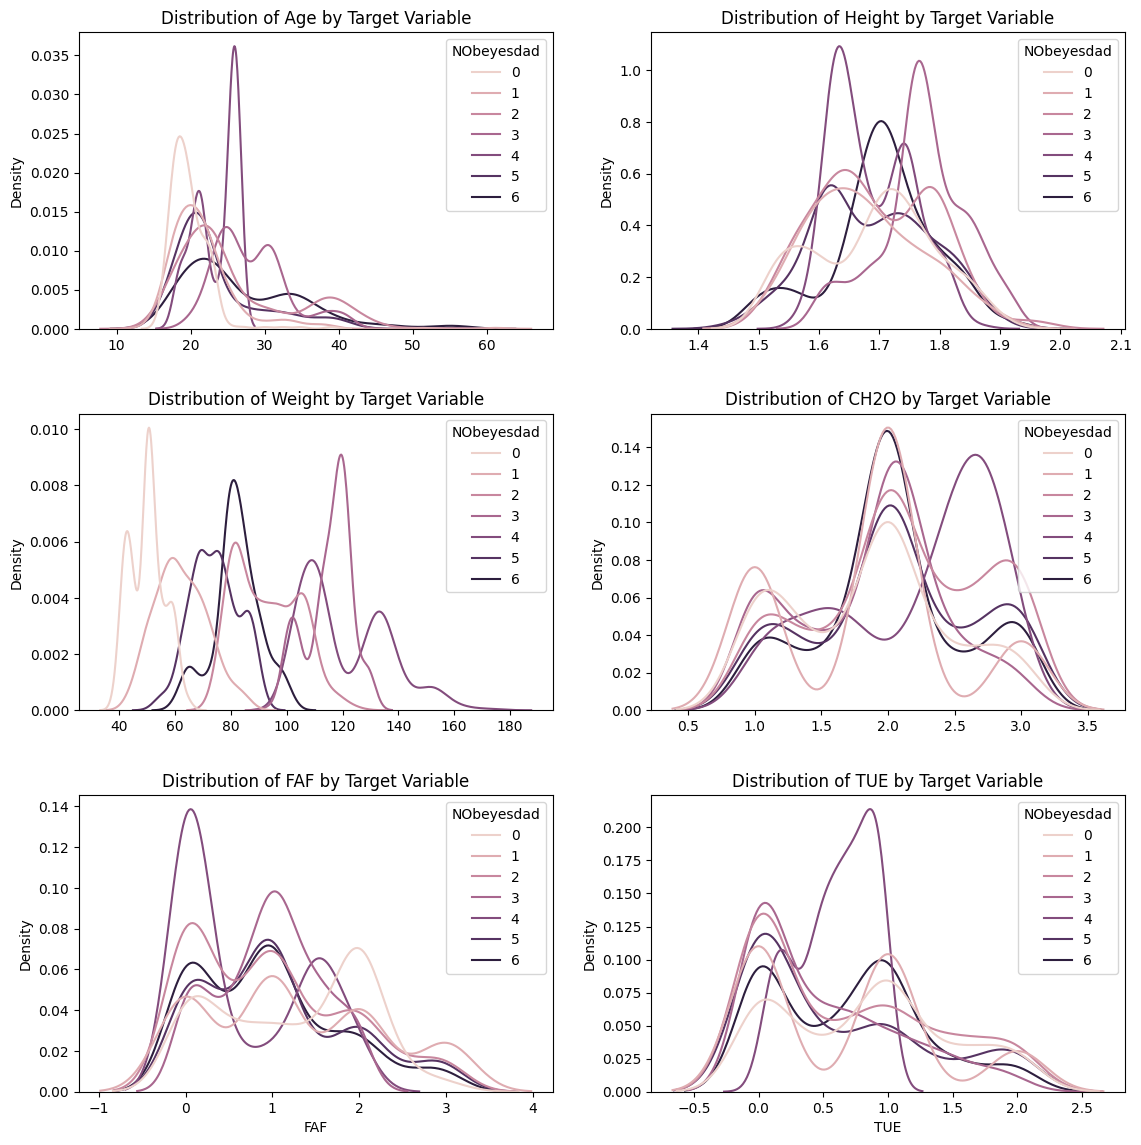

In [36]:
# continuous_features = ["Age", "Height", "Weight", "CH2O","FAF", "TUE"]
fig, axes = plt.subplots(3, 2, figsize=(12,12))
fig.tight_layout(pad=4.0)

axes[0,0].set_title("Distribution of Age by Target Variable")
sns.kdeplot(data=df, x='Age', hue='NObeyesdad', ax=axes[0,0])

axes[0,1].set_title("Distribution of Height by Target Variable")
sns.kdeplot(data=df, x='Height', hue='NObeyesdad', ax=axes[0,1])

axes[1,0].set_title("Distribution of Weight by Target Variable")
sns.kdeplot(data=df, x='Weight', hue='NObeyesdad', ax=axes[1,0])

axes[1,1].set_title("Distribution of CH2O by Target Variable")
sns.kdeplot(data=df, x='CH2O', hue='NObeyesdad', ax=axes[1,1])

axes[2,0].set_title("Distribution of FAF by Target Variable")
sns.kdeplot(data=df, x='FAF', hue='NObeyesdad', ax=axes[2,0])

axes[2,1].set_title("Distribution of TUE by Target Variable")
sns.kdeplot(data=df, x='TUE', hue='NObeyesdad', ax=axes[2,1])

for ax in axes[:2, :2].flat:
    ax.set_xlabel("")
    ax.set_ylabel("Density")

plt.show()



### Box Plots

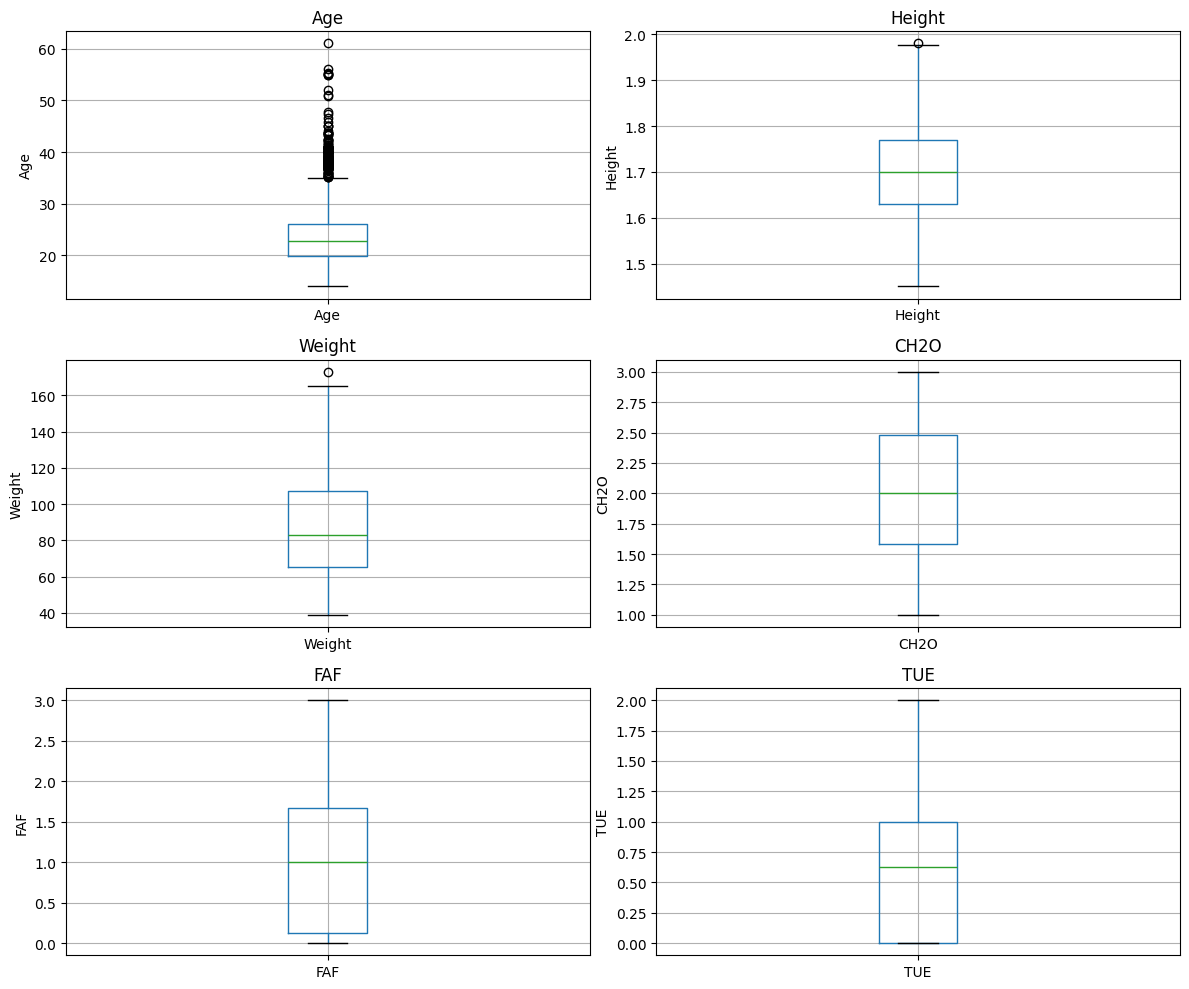

In [37]:
# Box Plots will be plotted for the continuous features to detect outliers
# continuous_features = ["Age", "Height", "Weight", "CH2O","FAF", "TUE"]

plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
fig = df.boxplot(column='Age')
fig.set_title('Age')
fig.set_ylabel('Age')

plt.subplot(3,2,2)
fig = df.boxplot(column='Height')
fig.set_title('Height')
fig.set_ylabel('Height')

plt.subplot(3,2,3)
fig = df.boxplot(column='Weight')
fig.set_title('Weight')
fig.set_ylabel('Weight')

plt.subplot(3,2,4)
fig = df.boxplot(column='CH2O')
fig.set_title('CH2O')
fig.set_ylabel('CH2O')

plt.subplot(3,2,5)
fig = df.boxplot(column='FAF')
fig.set_title('FAF')
fig.set_ylabel('FAF')

plt.subplot(3,2,6)
fig = df.boxplot(column='TUE')
fig.set_title('TUE')
fig.set_ylabel('TUE')

plt.tight_layout()
plt.show()

In [38]:
# Remove Outlier
# Split
# Scaling

# See the project iml

We can see there are potential outliers under `Age` feature. We will remove them using IQR method.

## Cleaning the data

In [39]:
# Removing outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filter values within the IQR range
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

In [40]:
df = remove_outliers_iqr(df, 'Age')

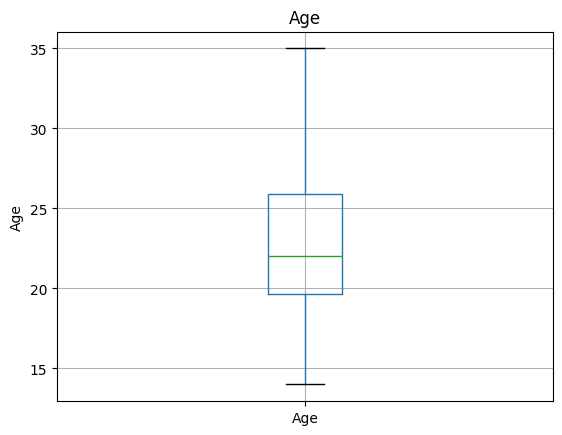

In [41]:
# Plot the boxplot for Age to check
fig = df.boxplot(column='Age')
fig.set_title('Age')
fig.set_ylabel('Age')

plt.show()

In [42]:
# Check the updated dataset's size
df.shape

(1943, 17)

## Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

# Separate the features and target
X = df.drop(columns='NObeyesdad')
y = df[target_variable]

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [45]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1457, 16)
Testing set shape: (486, 16)


## Scaling the Continuous Features

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
# Scale in the training set
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Scale in the test set
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [48]:
X_train

Gender       Age    Height    Weight  ...       FAF       TUE  CALC  MTRANS
815        1 -0.439236  1.741074  0.104717  ... -1.220297  0.161383     2       3
1548       1  1.797930  0.679599  1.175624  ... -0.496060  1.927059     2       0
1725       1  1.800343 -0.269659  0.567429  ...  0.171521  0.128844     3       3
750        1 -0.901464  1.651708  0.082658  ... -1.220297 -0.533159     2       3
627        0 -1.488329  1.372098 -1.606395  ...  2.113666  1.257462     2       3
...      ...       ...       ...       ...  ...       ...       ...   ...     ...
590        0 -0.600178 -1.924433 -1.725034  ... -1.049970 -0.618987     2       3
409        0  2.353896 -1.701887 -1.180127  ...  1.135102  0.492251     2       3
1468       1 -1.162873  1.164885  0.820108  ... -0.042598  0.067672     3       3
1827       0  0.712737 -0.532914  0.938785  ... -1.220297 -1.115823     2       3
1168       1 -0.072723 -0.219653 -0.212665  ... -0.710385  1.721375     3       3

[1457 rows x 16 columns]

In [49]:
X_test

Gender       Age    Height    Weight  ...       FAF       TUE  CALC  MTRANS
744        1 -1.162873  0.369279 -1.356774  ... -0.413716  1.291169     2       3
313        1 -1.397324 -0.494543 -1.142948  ... -0.042598  0.492251     2       3
1903       0 -0.896186  0.125823  1.520601  ... -0.145842  0.012618     2       3
53         0  0.009383 -0.823818 -1.180127  ...  1.135102  0.492251     3       3
411        0 -0.693970 -1.153094 -0.808343  ... -1.220297 -1.147486     2       3
...      ...       ...       ...       ...  ...       ...       ...   ...     ...
1938       0 -0.362574  0.162911  1.752732  ...  0.612386  0.285539     2       3
605        0 -0.832952 -2.021701 -1.663446  ... -1.220297  0.073388     2       3
934        1 -0.793218  1.423103  0.099897  ...  1.135102 -0.805891     2       3
1060       0  2.654387 -0.348202 -0.354554  ... -0.426118  0.012211     3       0
2089       0  0.712737 -0.781155  0.934513  ... -1.220297 -0.944387     2       3

[486 rows x 16 columns]